now how to do data visualization


In [20]:
import IPython
import py4cytoscape as p4c

In [2]:
print(f'Loading Javascript client ... {p4c.get_browser_client_channel()} on {p4c.get_jupyter_bridge_url()}')
browser_client_js = p4c.get_browser_client_js()
IPython.display.Javascript(browser_client_js) # Start browser client

Loading Javascript client ... a3103704-cb2b-4b6a-93ed-21d0a1f7e5cc on https://jupyter-bridge.cytoscape.org


<IPython.core.display.Javascript object>

In [3]:
p4c.cytoscape_version_info()


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.8.2',
 'automationAPIVersion': '1.1.0',
 'py4cytoscapeVersion': '0.0.8'}

In [4]:
p4c.sandbox_get_file_info('.')


{'filePath': 'C:\\Users\\stefa\\CytoscapeConfiguration\\filetransfer\\default_sandbox',
 'modifiedTime': '2021-05-11 14:42:26.0749',
 'isFile': False}

In [5]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 6477-7F8D

 Directory of C:\Users\stefa\Documents\GitHub\2021-internship\newFolder2

11-05-2021  14:43    <DIR>          .
11-05-2021  14:43    <DIR>          ..
11-05-2021  14:39    <DIR>          .ipynb_checkpoints
11-05-2021  14:42         1.390.524 BasicDataVizDemo.cys
11-05-2021  14:43    <DIR>          data
11-05-2021  14:43            16.838 dataVis.ipynb
11-05-2021  10:04             2.355 loadP.ipynb
11-05-2021  09:42    <DIR>          logs
06-05-2021  09:44            70.445 testNotebook.ipynb
04-05-2021  13:09            20.330 wikiPathways-and-py4cytoscape.ipynb
06-05-2021  09:44           362.503 youtubePandaTutorial.ipynb
               6 File(s)      1.862.995 bytes
               5 Dir(s)  141.560.229.888 bytes free


In [6]:
p4c.sandbox_send_to("BasicDataVizDemo.cys")


{'filePath': 'C:\\Users\\stefa\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\BasicDataVizDemo.cys'}

In [7]:
p4c.open_session(file_location="BasicDataVizDemo.cys")


Opening C:\Users\stefa\CytoscapeConfiguration\filetransfer\default_sandbox/BasicDataVizDemo.cys...


{}

Now how to export what you see in cytoscape to jupyter output

In [8]:
p4c.export_image(filename="BasicDataVizDemo.png")


{'file': 'C:\\Users\\stefa\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\BasicDataVizDemo.png'}

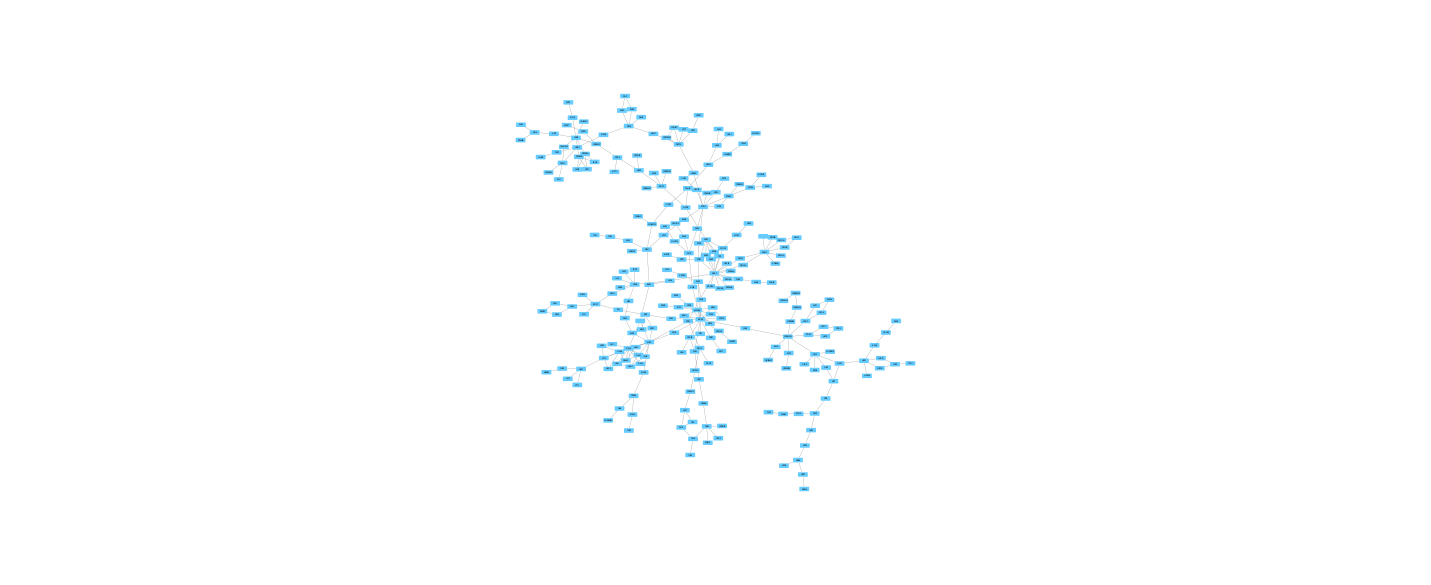

In [9]:
p4c.sandbox_get_from("BasicDataVizDemo.png")
from IPython.display import Image
Image('BasicDataVizDemo.png')

In [10]:
p4c.select_nodes(['YDL194W', 'YLR345W'], by_col='name')


{'nodes': [631, 636], 'edges': []}

That one shows which genes are selected. Nifty for large networks!

We can now use the data to manipulate the visual properties of the network by mapping specific data columns to visual style properties:

The gal80Rexp expression values will be mapped to node color; nodes with low expression will be colored blue, nodes with high expression will be colored red.
Significance for expression values will be mapped to Node Border Width, so nodes with significant changes will appear with a thicker border.

In [11]:
gal80Rexp_score_table = p4c.get_table_columns(table='node', columns='gal80Rexp')


In [12]:
gal80Rexp_score_table.head()


,gal80Rexp
631,0.449
632,0.448
633,-0.232
634,0.247
635,0.94


In [13]:
gal80Rexp_min = gal80Rexp_score_table.min().values[0]
gal80Rexp_max = gal80Rexp_score_table.max().values[0]
gal80Rexp_center = gal80Rexp_min + (gal80Rexp_max - gal80Rexp_min)/2

In [14]:
p4c.set_node_color_mapping('gal80Rexp', [gal80Rexp_min, gal80Rexp_center, gal80Rexp_max], ['#0000FF', '#FFFFFF', '#FF0000'])


style_name not specified, so updating "default" style.


''

In [15]:
p4c.set_node_color_default('#666666')


style_name not specified, so updating "default" style.


''

set no data nodes to something that does not fall in your gradient

In [16]:
gal80Rsig_score_table = p4c.get_table_columns(table='node', columns='gal80Rsig')
gal80Rsig_min = gal80Rsig_score_table.min().values[0]
gal80Rsig_max = gal80Rsig_score_table.max().values[0]
p4c.set_node_border_width_mapping('gal80Rsig', table_column_values=[gal80Rsig_min, gal80Rsig_max], widths=[10, 30])

style_name not specified, so updating "default" style.


''

this thing above sets significance. not very good tho. You should just use cut off points at 0,05

In [21]:
gal80Rsig_score_table = p4c.get_table_columns(table='node', columns='gal80Rsig')
gal80Rsig_min = gal80Rsig_score_table.min().values[0]
gal80Rsig_max = gal80Rsig_score_table.max().values[0]
gal80Rsig_sig = 0.05
p4c.set_node_border_width_mapping('gal80Rsig', table_column_values=[gal80Rsig_min, gal80Rsig_sig, gal80Rsig_max], widths=[50, 45, 10])

style_name not specified, so updating "default" style.


''

now lets undo that

In [22]:
gal80Rsig_score_table = p4c.get_table_columns(table='node', columns='gal80Rsig')
gal80Rsig_min = gal80Rsig_score_table.min().values[0]
gal80Rsig_max = gal80Rsig_score_table.max().values[0]
p4c.set_node_border_width_mapping('gal80Rsig', table_column_values=[gal80Rsig_min, gal80Rsig_max], widths=[10, 30])

style_name not specified, so updating "default" style.


''

In [23]:
p4c.layout_network('degree-circle')


{}

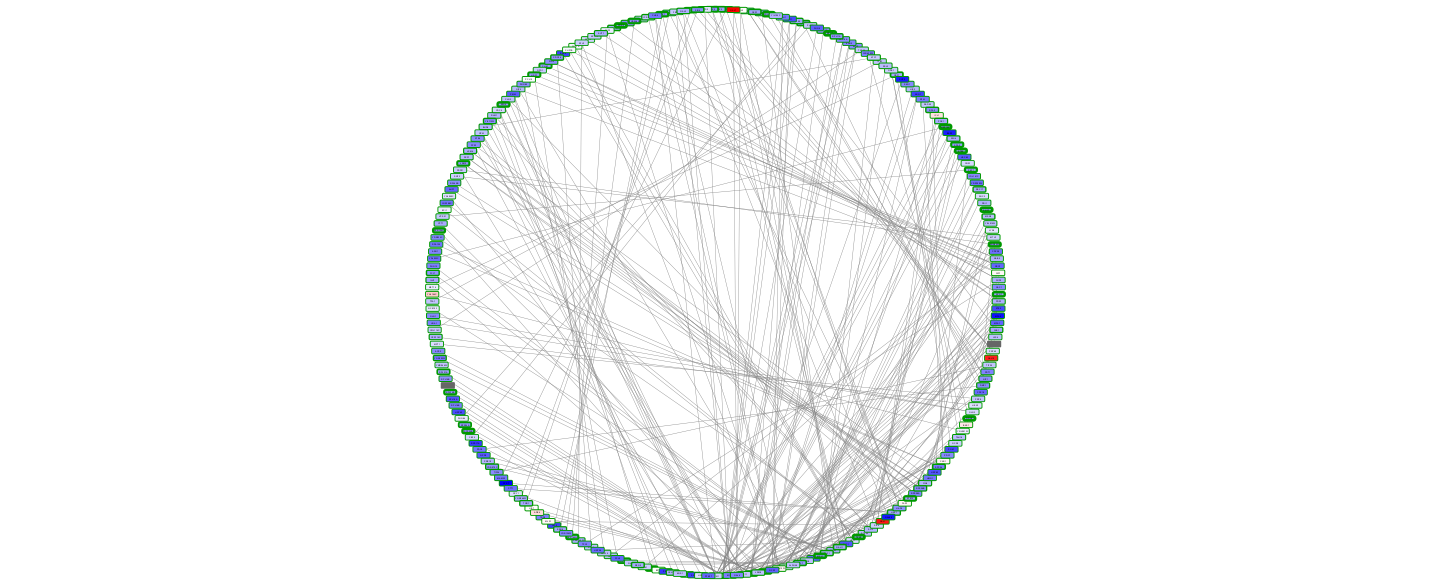

In [24]:
p4c.export_image(filename='degree-circle.png')
p4c.sandbox_get_from('degree-circle.png')
Image('degree-circle.png')

Pretty shit

In [25]:
p4c.layout_network('force-directed')


{}

This file already exists. A Cytoscape popup will be generated to confirm overwrite.


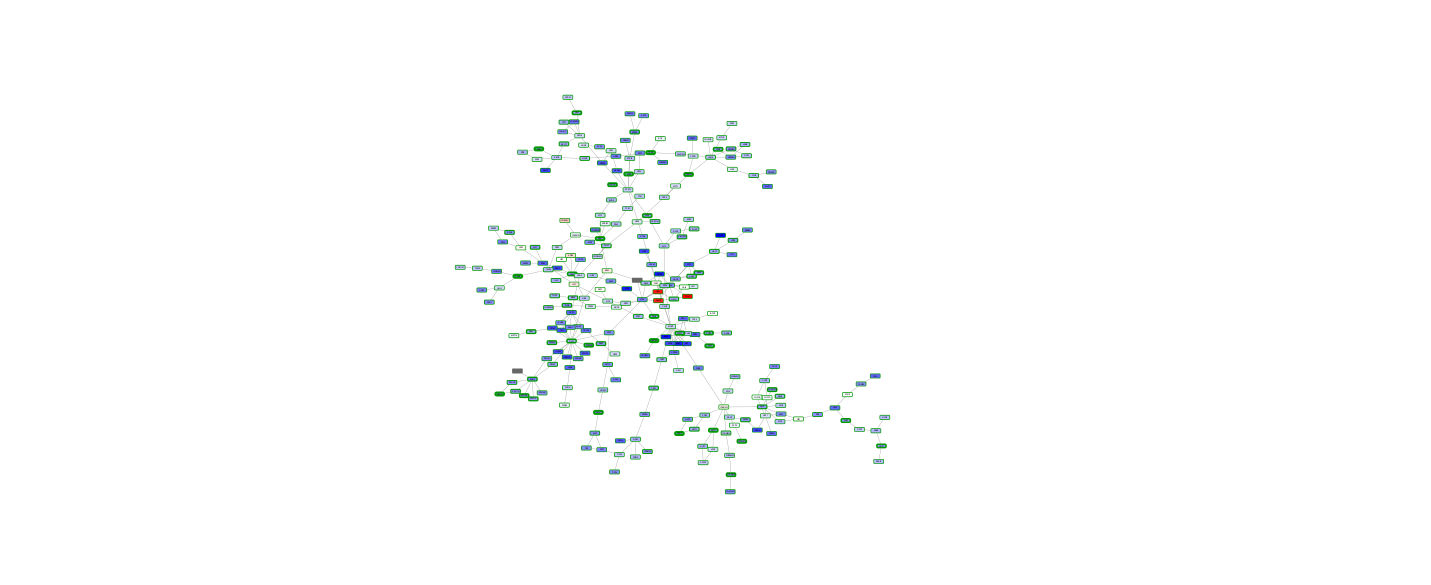

In [27]:
p4c.export_image(filename='force-directed.png')
p4c.sandbox_get_from('force-directed.png')
Image('force-directed.png')

In [29]:
p4c.create_column_filter('myFilter', 'gal80Rexp', 2.00, "GREATER_THAN")


Warning -- Cytoscape version pre-3.9 in use ... settling delay inserted after filter execution


No edges selected.


{'nodes': ['YBR018C', 'YBR020W', 'YBR019C'], 'edges': None}

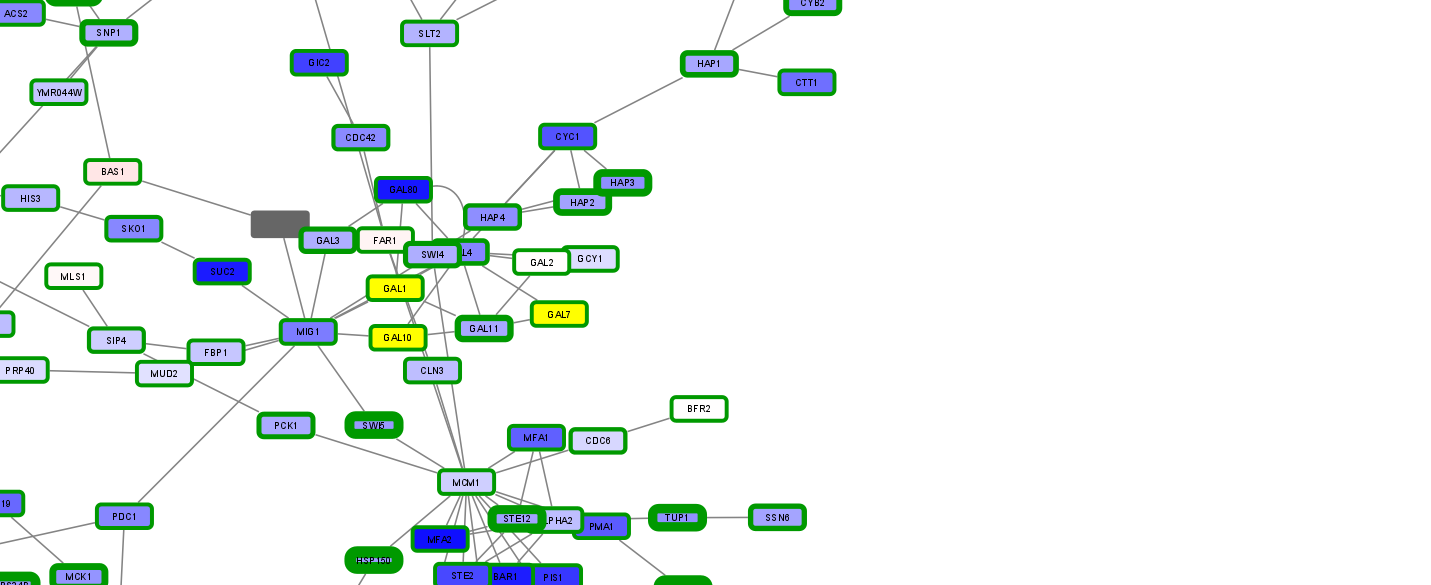

In [31]:
p4c.export_image(filename='column-filter.png')
p4c.sandbox_get_from('column-filter.png')
Image('column-filter.png')

In [33]:
p4c.select_first_neighbors()


{'nodes': [707, 804, 805, 807, 808, 809, 810], 'edges': []}

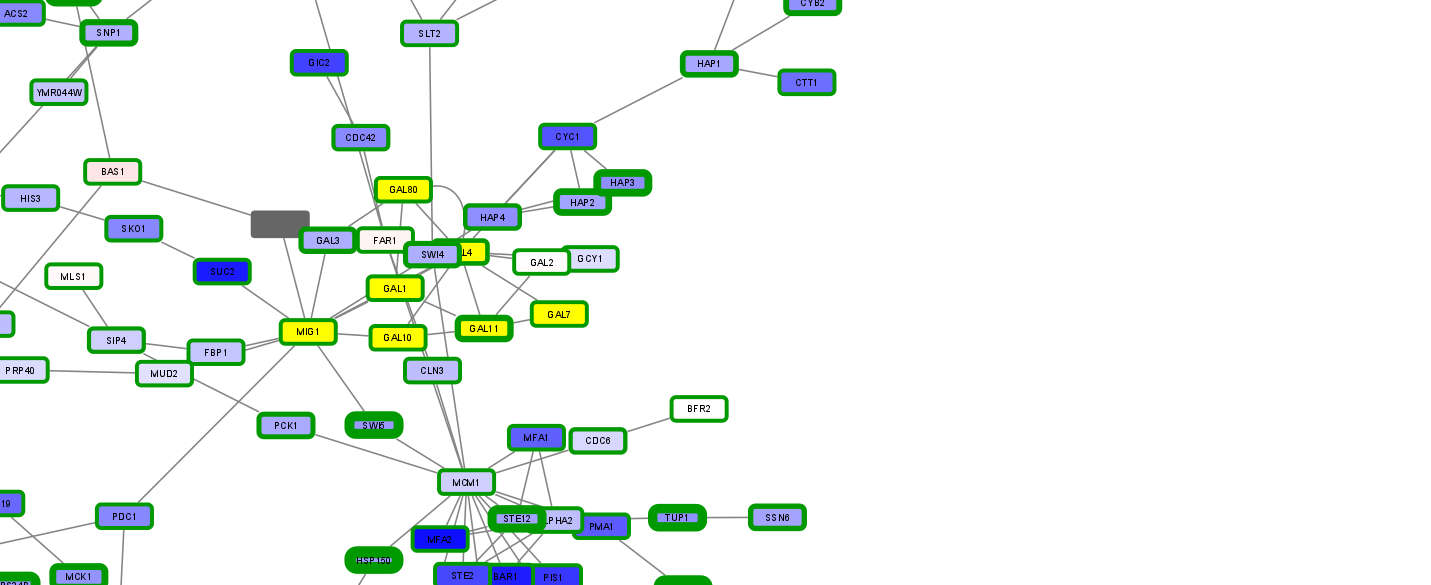

In [34]:
p4c.export_image(filename='first-neighbors.png')
p4c.sandbox_get_from('first-neighbors.png')
Image('first-neighbors.png')

In [35]:
p4c.save_session('basic-data-visualization.cys')


{}

In [36]:

p4c.export_image('basic-data-visualization', type='PDF')
p4c.export_image('basic-data-visualization', type='PNG')
p4c.export_image('basic-data-visualization', type='JPEG')
p4c.export_image('basic-data-visualization', type='SVG')
p4c.export_image('basic-data-visualization', type='PS')

{'file': 'C:\\Users\\stefa\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\basic-data-visualization.ps'}

In [37]:

p4c.export_network('basic-data-visualization', 'CX')
p4c.export_network('basic-data-visualization', 'cyjs')
p4c.export_network('basic-data-visualization', 'graphML')
p4c.export_network('basic-data-visualization', 'xGMML')
p4c.export_network('basic-data-visualization', 'SIF')

{'file': 'C:\\Users\\stefa\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\basic-data-visualization.sif'}

In [14]:
linkset = 'wikipathways-hsa-20190610.gxmml'


In [21]:
cmd = ''.join(['cytargetlinker extend idAttribute="display name" linkSetFiles="', str(linkset), '" network=current'])
p4c.commands.commands_get(cmd)


In commands_get(): Failed: null


CyError: In commands_get(): Failed: null